## 주유소별 가격비교

### 주차 별 가격변동 추이 확인

#### 결측치, 이상치 확인

In [2]:
# 라이브러리 등록
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import re

In [3]:
# 데이터 읽어오기
data = pd.read_csv('./data/부산시 주유소 유가 데이터(20220209-20220809).csv')

In [4]:
# 데이터 확인
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      67411 non-null  object
 1   지역      67411 non-null  object
 2   상호      67411 non-null  object
 3   주소      67411 non-null  object
 4   기간      67411 non-null  int64 
 5   상표      67411 non-null  object
 6   셀프여부    67411 non-null  object
 7   휘발유     67411 non-null  int64 
 8   경유      67411 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [5]:
# 결측치 확인
data.isnull().sum() # 결측치 없음

번호      0
지역      0
상호      0
주소      0
기간      0
상표      0
셀프여부    0
휘발유     0
경유      0
dtype: int64

In [6]:
data.describe() # 최소값이 0인 값을 발견

,기간,휘발유,경유
count,6.741100e+04,67411.000000,67411.000000
mean,2.022051e+07,1944.169601,1915.648099
std,1.704899e+02,163.496779,170.126046
min,2.022021e+07,0.000000,0.000000
25%,2.022033e+07,1897.000000,1859.000000
50%,2.022051e+07,1965.000000,1928.000000
75%,2.022063e+07,2030.000000,2035.000000
max,2.022081e+07,2385.000000,2438.000000


In [7]:
# 휘발유 0인 값 추출
data = data[data['휘발유'] != 0]

In [8]:
# 경유 0인 값 추출
data = data[data['경유'] != 0]

In [9]:
data.describe()

,기간,휘발유,경유
count,6.719300e+04,67193.000000,67193.000000
mean,2.022051e+07,1950.448529,1916.207105
std,1.704692e+02,120.712273,167.341629
min,2.022021e+07,1599.000000,1439.000000
25%,2.022033e+07,1898.000000,1859.000000
50%,2.022051e+07,1965.000000,1928.000000
75%,2.022063e+07,2033.000000,2035.000000
max,2.022081e+07,2385.000000,2438.000000


In [10]:
# 수정한 데이터 파일저장
data.to_csv('./data/부산_유가데이터_수정.csv', index= False, encoding='utf-8')

#### 데이터 핸들링

In [11]:
data = pd.read_csv('./data/부산_유가데이터_수정.csv')

In [12]:
# 기간의 데이터 타입을 datetime64로 변경
data['기간'] = pd.to_datetime(data['기간'].astype(str))

In [13]:
# 주차 컬럼 생성
data['주차'] = data['기간'].dt.isocalendar().week

In [14]:
# 주차별 휘발유 / 경유 평균 가격비교
week_avg_oil = data.groupby(['주차'])[['휘발유', '경유']].mean().round().astype(int)
week_avg_oil

,휘발유,경유
주차,,
7,1695,1527
8,1717,1551
9,1754,1588
10,1922,1791
11,2002,1901
12,1993,1897
13,1984,1893
14,1970,1884
15,1953,1877


In [15]:
# 컬럼명 변경
week_avg_oil.columns = ['휘발유 평균가격', '경유 평균가격']
week_avg_oil

,휘발유 평균가격,경유 평균가격
주차,,
7,1695,1527
8,1717,1551
9,1754,1588
10,1922,1791
11,2002,1901
12,1993,1897
13,1984,1893
14,1970,1884
15,1953,1877


#### 시각화

In [16]:
import matplotlib.pyplot as plt

In [17]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path  = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [18]:
data.describe()

,기간,휘발유,경유,주차
count,67193,67193.000000,67193.000000,67193.0
mean,2022-05-12 23:38:47.010253824,1950.448529,1916.207105,19.144762
min,2022-02-14 00:00:00,1599.000000,1439.000000,7.0
25%,2022-03-30 00:00:00,1898.000000,1859.000000,13.0
50%,2022-05-13 00:00:00,1965.000000,1928.000000,19.0
75%,2022-06-26 00:00:00,2033.000000,2035.000000,25.0
max,2022-08-09 00:00:00,2385.000000,2438.000000,32.0
std,NaN,120.712273,167.341629,7.3101


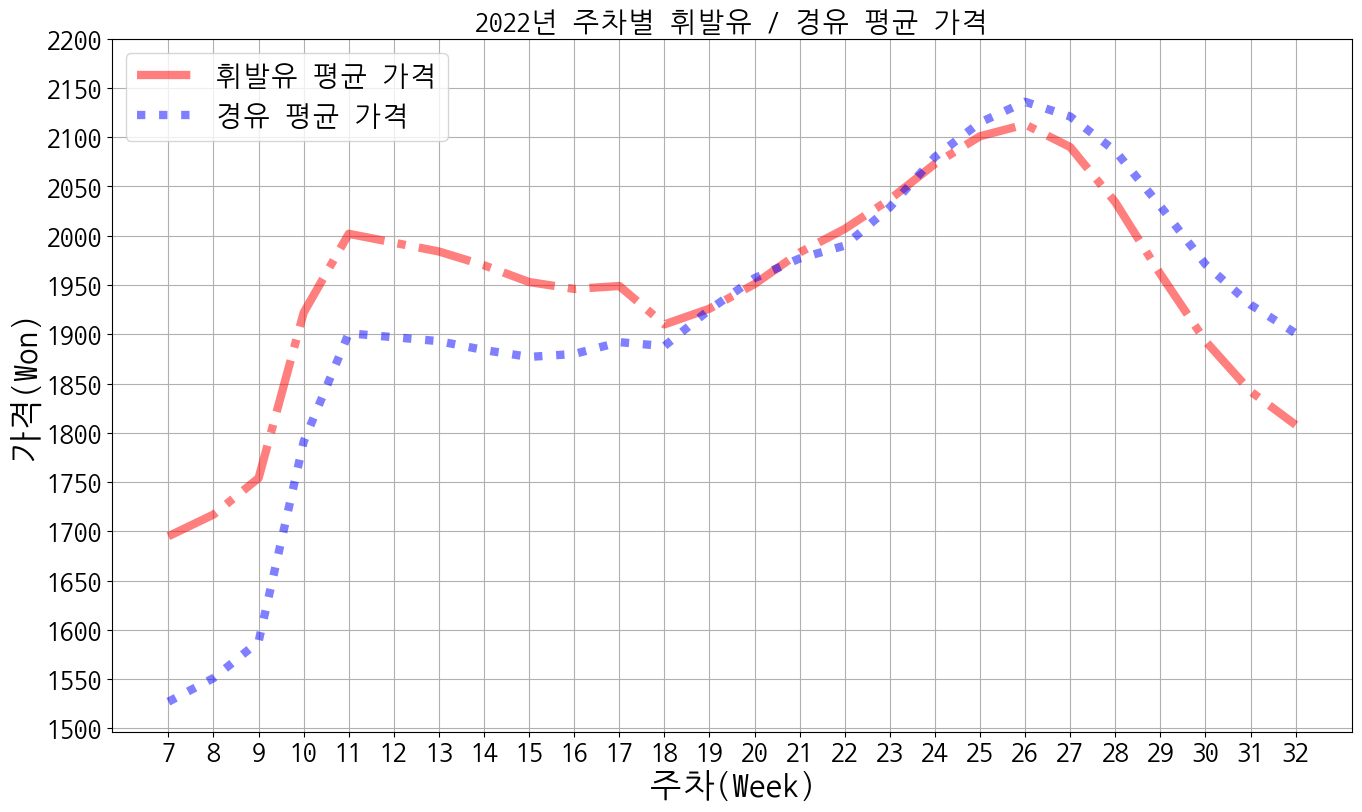

In [33]:
plt.figure(figsize = (16,9))
plt.title('2022년 주차별 휘발유 / 경유 평균 가격', fontsize=20)

ax0 = week_avg_oil.index
ax1 = week_avg_oil['휘발유 평균가격']
ax2 = week_avg_oil['경유 평균가격']

a = plt.plot(ax1, label= '휘발유 평균 가격', linestyle= '-.', color= 'red', linewidth=6, alpha=0.5)
b = plt.plot(ax2, label= '경유 평균 가격', linestyle= ':', color= 'blue', linewidth=6, alpha=0.5)

plt.xticks(ax0, fontsize=20)
plt.xlabel('주차(Week)',fontsize=24)
plt.yticks(np.arange(1500, 2250, 50), fontsize=20)
plt.ylabel('가격(Won)', fontsize=24)

plt.legend(fontsize=20)
plt.grid()

plt.show()

#### 상표별 평균 가격비교

In [26]:
# 상표별 평균 가격비교
brand_avg_oil = data.groupby(['상표'])[['휘발유', '경유']].mean().round().astype(int)
brand_avg_oil

,휘발유,경유
상표,,
GS칼텍스,1943,1909
NH-OIL,1915,1882
S-OIL,1960,1922
SK에너지,1963,1931
알뜰주유소,1912,1884
자가상표,1952,1908
현대오일뱅크,1947,1911


In [29]:
# 컬럼명 변경
brand_avg_oil.columns = ['휘발유 평균가격', '경유 평균가격']
brand_avg_oil

,휘발유 평균가격,경유 평균가격
상표,,
GS칼텍스,1943,1909
NH-OIL,1915,1882
S-OIL,1960,1922
SK에너지,1963,1931
알뜰주유소,1912,1884
자가상표,1952,1908
현대오일뱅크,1947,1911


#### 시각화

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

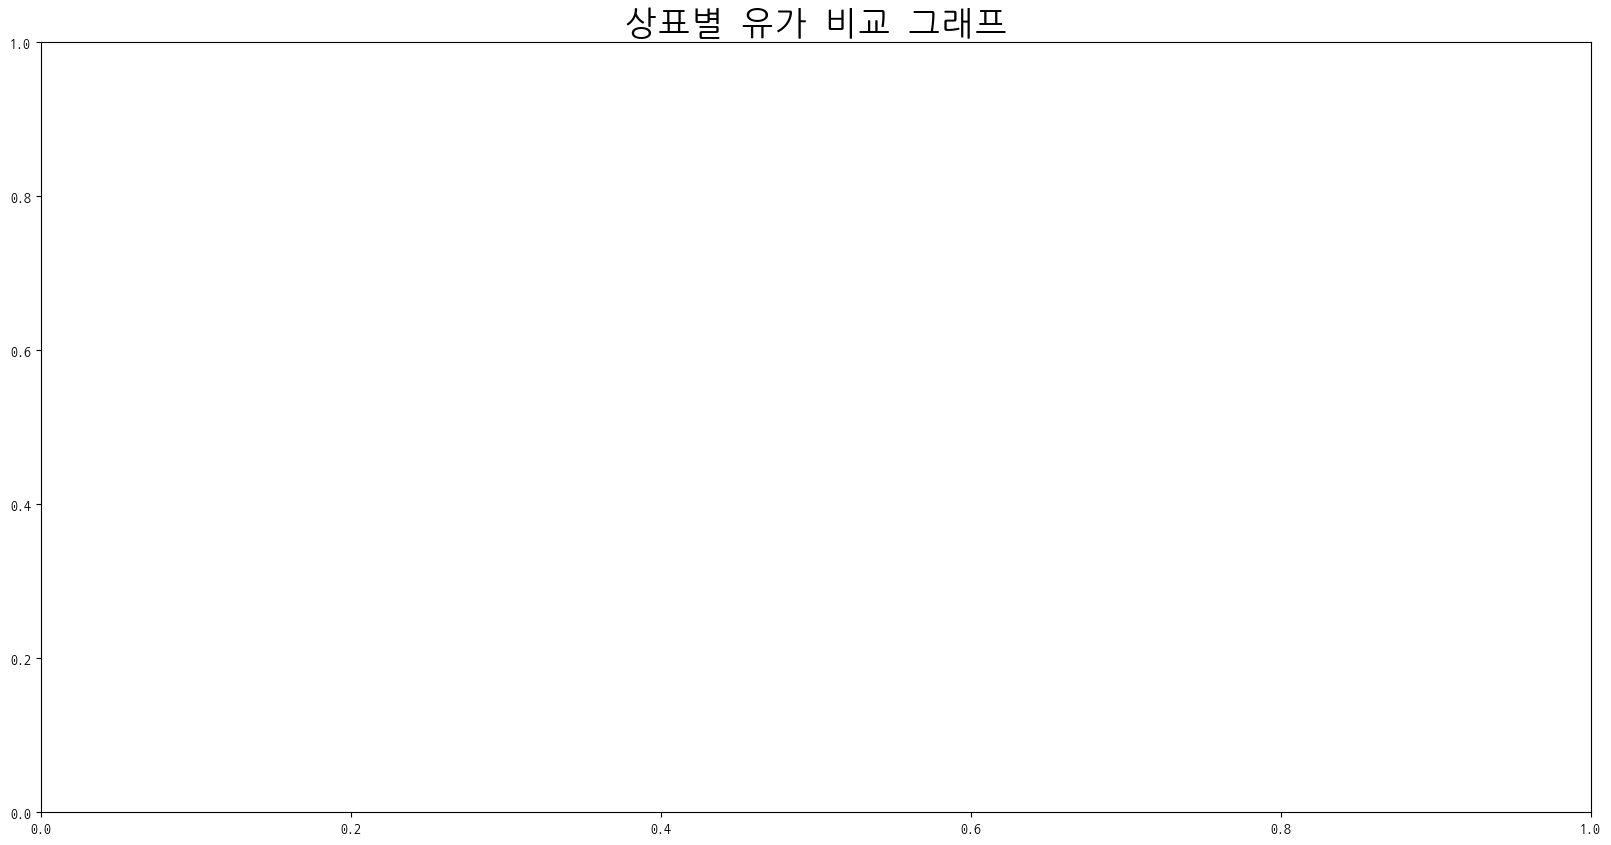

In [42]:
plt.figure(figsize=(20,10))
plt.title('상표별 유가 비교 그래프', fontsize=24)

plt.bar()
plt.show()